<H1> Capstone Project 2 - Analisis Rute dan Penumpang Transjakarta </H1>

# Introduction

## Latar Belakang

**Yayasan Kartini** adalah lembaga nirlaba yang berfokus pada pemberdayaan wanita di Indonesia, dengan tujuan utama untuk meningkatkan kesejahteraan dan kualitas hidup masyarakat, khususnya wanita dan kelompok rentan lainnya. Seiring dengan pesatnya pertumbuhan kota-kota besar seperti Jakarta, tantangan mobilitas menjadi semakin signifikan bagi kelompok-kelompok ini. Dalam proyek ini, yayasan berkomitmen untuk mengatasi masalah mobilitas yang sering kali menjadi penghalang utama bagi akses terhadap layanan publik, peluang kerja, serta partisipasi dalam kegiatan sosial dan pendidikan.

Di Jakarta, wanita kerap menghadapi berbagai kendala dalam mengakses transportasi umum yang aman dan nyaman. Tingginya tingkat kemacetan dan padatnya jadwal kegiatan sehari-hari membuat perjalanan mereka menjadi pengalaman yang penuh tekanan, terutama selama jam-jam sibuk. Keterbatasan fasilitas transportasi yang ramah pengguna, seperti area duduk yang memadai dan aksesibilitas yang baik, sering kali menghambat aktivitas harian mereka. Dampak dari masalah ini tidak hanya terbatas pada kehidupan pribadi, tetapi juga pada kontribusi mereka dalam pendidikan, ekonomi, dan peran sosial di masyarakat.

Untuk mengatasi tantangan ini, **_Yayasan Kartini berencana mendonasikan 10 unit bus khusus yang akan diintegrasikan dalam layanan Transjakarta_**. Bus-bus ini dirancang dengan fokus pada kenyamanan dan keamanan, terutama bagi wanita. Fasilitas yang disediakan meliputi area tempat duduk yang lebih nyaman, aksesibilitas yang lebih baik, serta layanan keamanan tambahan untuk memastikan perjalanan yang aman dan menyenangkan. Inisiatif ini diharapkan tidak hanya dapat mengurangi kepadatan penumpang, tetapi juga meningkatkan kesadaran masyarakat akan pentingnya aksesibilitas dan keselamatan dalam sistem transportasi umum di Jakarta.

Melalui langkah konkret ini, Yayasan Kartini berupaya memberikan solusi yang berkelanjutan dan inklusif, dengan harapan dapat meningkatkan kualitas hidup wanita dan kelompok rentan di Jakarta serta menciptakan lingkungan perkotaan yang lebih adil dan berdaya.


## Pernyataan Masalah

**Yayasan Kartini** bersama **Transjakarta** berencana meluncurkan 10 unit bus inovatif sebagai ujicoba untuk transportasi ramah wanita di Jakarta. Untuk memastikan inisiatif ini efektif dan berdampak, diperlukan analisis mendalam dan berbasis data. Analisis ini bertujuan untuk memahami pola perjalanan dan kebutuhan penumpang guna memaksimalkan manfaat dari bus yang didonasikan.

### Pertanyaan Kunci:

1. **Rute Apa yang Paling Populer?**  
   Menilai rute-rute dengan volume penumpang tertinggi untuk memastikan bus beroperasi di jalur yang paling membutuhkan. Analisis ini akan membantu dalam alokasi sumber daya secara efisien.

2. **Kapan Waktu Puncak Perjalanan?**  
   Mengidentifikasi hari dan jam dengan kepadatan penumpang tertinggi untuk menentukan jadwal operasional bus yang optimal. Tujuannya adalah menyesuaikan jadwal bus agar sesuai dengan kebutuhan penumpang.

3. **Bagaimana Pola Distribusi Penumpang?**  
   Memeriksa distribusi penumpang berdasarkan variabel seperti jenis kelamin dan tujuan perjalanan untuk merancang layanan yang lebih inklusif dan responsif. Data ini akan membantu dalam menyesuaikan desain dan layanan bus untuk memberikan dampak positif yang maksimal.


## Data Description

| Column Name       | Description                                                      |
|-------------------|------------------------------------------------------------------|
| `transID`         | Unique transaction id for every transaction                     |
| `payCardID`       | Customers main identifier. The card customers use as a ticket for entrance and exit |
| `payCardBank`     | Customers card bank issuer name                                  |
| `payCardName`     | Customers name that is embedded in the card                     |
| `payCardSex`      | Customers sex that is embedded in the card                       |
| `payCardBirthDate`| Customers birth year                                             |
| `corridorID`      | Corridor ID / Route ID as key for route grouping                 |
| `corridorName`    | Corridor Name / Route Name contains Start and Finish for each route |
| `direction`       | 0 for Go, 1 for Back. Direction of the route                     |
| `tapInStops`      | Tap In (entrance) Stops ID for identifying stops name            |
| `tapInStopsName`  | Tap In (entrance) Stops Name where customers tap in              |
| `tapInStopsLat`   | Latitude of Tap In Stops                                         |
| `tapInStopsLon`   | Longitude of Tap In Stops                                        |
| `stopStartSeq`    | Sequence of the stops, 1st stop, 2nd stop, etc. Related to direction |
| `tapInTime`       | Time of tap in. Date and time                                    |
| `tapOutStops`     | Tap Out (Exit) Stops ID for identifying stops name               |
| `tapOutStopsName` | Tap Out (exit) Stops Name where customers tap out                |
| `tapOutStopsLat`  | Latitude of Tap Out Stops                                        |
| `tapOutStopsLon`  | Longitude of Tap Out Stops                                       |
| `stopEndSeq`      | Sequence of the stops, 1st stop, 2nd stop, etc. Related to direction |
| `tapOutTime`      | Time of tap out. Date and time                                   |
| `payAmount`       | The number of what customers pay. Some are free. Some not         |

# Data Preparation

## Library & Helper Functions

### Library Imports

Untuk analisis data dan visualisasi, kita menggunakan beberapa pustaka Python utama:

- **`pandas`**: Digunakan untuk manipulasi dan analisis data, terutama dalam bentuk DataFrame.
- **`numpy`**: Menyediakan dukungan untuk operasi matematis dan array multidimensi.
- **`matplotlib`**: Pustaka utama untuk visualisasi data, memungkinkan pembuatan grafik dan plot.
- **`seaborn`**: Dibangun di atas matplotlib, menyediakan antarmuka tingkat tinggi untuk membuat visualisasi statistik yang menarik dan informatif.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('future.no_silent_downcasting', True)

### Helper Functions

Fungsi-fungsi berikut membantu dalam analisis dan visualisasi data:

- **`print_data_info(df)`**: 
  Menampilkan informasi rinci tentang DataFrame yang diberikan, termasuk tipe data setiap kolom, jumlah dan persentase nilai yang hilang, serta jumlah nilai unik. Ini berguna untuk memahami struktur dan kualitas data sebelum analisis lebih lanjut.

- **`draw_isna_heatmap(df, title='')`**:
  Menggambar heatmap yang menunjukkan lokasi nilai yang hilang (null) dalam DataFrame. Menggunakan kolormap 'inferno', fungsi ini membantu visualisasi penyebaran nilai yang hilang di seluruh DataFrame.

- **`draw_isna_heatmap_side_by_side(df_list, titles)`**:
  Menggambar dua heatmap berdampingan untuk membandingkan lokasi nilai yang hilang antara dua DataFrame. Heatmap ditampilkan dalam format berdampingan untuk memudahkan perbandingan visual antara dua DataFrame yang berbeda, dengan masing-masing diberi judul sesuai dengan daftar `titles`.

In [2]:
def print_data_info(df):
    """
    Menampilkan informasi rinci tentang DataFrame, termasuk detail tipe data,
    jumlah dan persentase nilai yang hilang, serta jumlah nilai unik untuk setiap kolom.

    Informasi yang ditampilkan meliputi:
    - Tipe data untuk setiap kolom.
    - Jumlah nilai yang hilang (null) di setiap kolom.
    - Persentase nilai yang hilang dari total jumlah nilai di setiap kolom.
    - Jumlah nilai unik di setiap kolom.
    - Sample dari setiap kolom.
    
    Args:
        df (pd.DataFrame): DataFrame yang akan dianalisis. Harus merupakan objek DataFrame dari pustaka pandas.

    Returns:
        None: Fungsi ini hanya menampilkan informasi dan tidak mengembalikan nilai.
    """
    # Buat DataFrame untuk menyimpan informasi kolom
    data_info = pd.DataFrame({
        'Feature': df.columns,
        'Data Type': df.dtypes,
        'Null Count': df.isna().sum(),
        'Null Percentage (%)': (df.isna().mean() * 100).round(2),
        'Unique Values': df.nunique(),
    })
    data_info.reset_index(drop=True, inplace=True)
    
    # Tampilkan Informasi
    print(f'Jumlah baris: {df.shape[0]:,}, Jumlah kolom: {df.shape[1]:,}')
    print('-' * 80)
    display(data_info)


In [3]:
def draw_isna_heatmap(df, title=''):
    """
    Menggambar heatmap untuk menampilkan lokasi nilai yang hilang (null) dalam DataFrame.

    Heatmap ini menggunakan kolormap 'inferno' untuk menunjukkan sel-sel dengan nilai yang hilang. 
    Sel-sel dengan nilai yang hilang akan ditandai dengan warna yang berbeda, sedangkan sel-sel yang memiliki nilai tidak akan berwarna.

    Args:
        df (pd.DataFrame): DataFrame yang akan dianalisis. Harus merupakan objek DataFrame dari pustaka pandas.
        title (str, optional): Judul untuk heatmap yang ditampilkan. Default adalah string kosong.

    Returns:
        None: Fungsi ini hanya menampilkan heatmap dan tidak mengembalikan nilai.
    """
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isna(), cmap='inferno', cbar=False, yticklabels=False)
    plt.title(title)
    plt.xlabel('Kolom')
    plt.ylabel('Baris')
    plt.show()
    
    
def draw_isna_heatmap_side_by_side(df_list, titles):
    """
    Menggambar dua heatmap berdampingan untuk membandingkan lokasi nilai yang hilang (null) antara dua DataFrame.

    Heatmap ini menggunakan kolormap 'inferno' untuk menunjukkan sel-sel dengan nilai yang hilang. 
    Sel-sel dengan nilai yang hilang akan ditandai dengan warna yang berbeda, sedangkan sel-sel yang memiliki nilai tidak akan berwarna. 
    Heatmap ditampilkan dalam format berdampingan untuk memudahkan perbandingan visual antara dua DataFrame.

    Args:
        df_list (list of pd.DataFrame): Daftar yang berisi dua DataFrame yang akan dianalisis. Setiap elemen dalam daftar harus merupakan objek DataFrame dari pustaka pandas.
        titles (list of str): Daftar yang berisi dua string yang digunakan sebagai judul untuk setiap heatmap. Panjang daftar harus sesuai dengan jumlah DataFrame dalam df_list.

    Returns:
        None: Fungsi ini hanya menampilkan heatmap dan tidak mengembalikan nilai.
    """
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    for dataframe, title, axis in zip(df_list, titles, ax):
        sns.heatmap(dataframe.isna(), cmap='inferno', cbar=False, yticklabels=False, ax=axis)
        axis.set_title(title)
        axis.set_xlabel('Kolom')
        axis.set_ylabel('Baris')
    plt.tight_layout()
    plt.show()


## Data Cleansing




Data cleansing adalah proses krusial dalam analisis data yang bertujuan untuk meningkatkan kualitas data dengan mengidentifikasi dan memperbaiki masalah yang memengaruhi keakuratan dan konsistensi data. Proses ini memastikan bahwa data yang digunakan dalam analisis adalah akurat, konsisten, dan dapat diandalkan.

### Tujuan Data Cleansing

1. **Memastikan Keakuratan Data**: Menghilangkan kesalahan, duplikasi, dan inkonsistensi untuk mendapatkan data yang valid.
2. **Meningkatkan Konsistensi Data**: Menyelaraskan format dan nilai data agar konsisten di seluruh dataset.
3. **Menyiapkan Data untuk Analisis**: Menghilangkan atau memperbaiki data yang tidak lengkap, salah format, atau tidak relevan sehingga analisis selanjutnya dapat dilakukan dengan lebih efektif.

Dengan melakukan data cleansing, kita dapat mempersiapkan data untuk analisis lebih lanjut dan memastikan hasil yang diperoleh lebih relevan, terpercaya, dan berguna untuk pengambilan keputusan. Proses ini membantu mengurangi risiko kesalahan dalam analisis dan meningkatkan kualitas keputusan berbasis data.

### Load Data

In [4]:
# Memuat data dari file CSV
file = 'data/Transjakarta.csv'
raw_data = pd.read_csv(file)

# Menampilkan beberapa baris pertama dari dataset untuk mendapatkan gambaran umum
display(raw_data.head())

# Menampilkan informasi detail tentang dataset, termasuk tipe data, nilai yang hilang, dan nilai unik
print_data_info(raw_data)


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


Jumlah baris: 37,900, Jumlah kolom: 22
--------------------------------------------------------------------------------


,Feature,Data Type,Null Count,Null Percentage (%),Unique Values
0,transID,object,0,0.00,37900
1,payCardID,int64,0,0.00,2000
2,payCardBank,object,0,0.00,6
3,payCardName,object,0,0.00,1993
4,payCardSex,object,0,0.00,2
5,payCardBirthDate,int64,0,0.00,67
6,corridorID,object,1257,3.32,221
7,corridorName,object,1930,5.09,216
8,direction,float64,0,0.00,2
9,tapInStops,object,1213,3.20,2570


### Menangani _Missing Values_


Penanganan nilai yang hilang (missing values) adalah langkah penting dalam proses pembersihan data untuk memastikan kualitas dan integritas dataset. Nilai yang hilang dapat memengaruhi hasil analisis dan model prediksi jika tidak ditangani dengan benar.

Berikut beberapa metode umum untuk menangani nilai yang hilang:

1. **Menghapus Data**  
   Menghapus baris atau kolom yang mengandung nilai yang hilang, jika jumlahnya relatif kecil dan tidak mempengaruhi analisis secara signifikan.

2. **Mengisi Nilai yang Hilang**  
   Mengganti nilai yang hilang dengan nilai lain, seperti rata-rata, median, modus, atau nilai yang dihitung berdasarkan metode interpolasi.

3. **Penggunaan Model**  
   Menggunakan teknik imputasi berbasis model untuk memperkirakan nilai yang hilang berdasarkan pola dalam data.

4. **Mengabaikan Nilai yang Hilang**  
   Dalam beberapa kasus, analisis dapat dilakukan dengan mengabaikan nilai yang hilang, terutama jika mereka tidak mempengaruhi hasil secara signifikan.

Memilih metode yang tepat tergantung pada sifat data dan tujuan analisis, serta seberapa besar dampak nilai yang hilang terhadap hasil akhir. Penanganan nilai yang hilang yang efektif dapat meningkatkan kualitas data dan hasil analisis secara keseluruhan.

#### Cek _Missing Value_ dari Raw Data

Kolom dengan nilai yang hilang: 10 ditemukan.
Jumlah baris: 37,900, Jumlah kolom: 10
--------------------------------------------------------------------------------


,Feature,Data Type,Null Count,Null Percentage (%),Unique Values
0,corridorID,object,1257,3.32,221
1,corridorName,object,1930,5.09,216
2,tapInStops,object,1213,3.20,2570
3,tapOutStops,object,2289,6.04,2230
4,tapOutStopsName,object,1344,3.55,2248
5,tapOutStopsLat,float64,1344,3.55,2237
6,tapOutStopsLon,float64,1344,3.55,2139
7,stopEndSeq,float64,1344,3.55,74
8,tapOutTime,object,1344,3.55,35908
9,payAmount,float64,1007,2.66,3


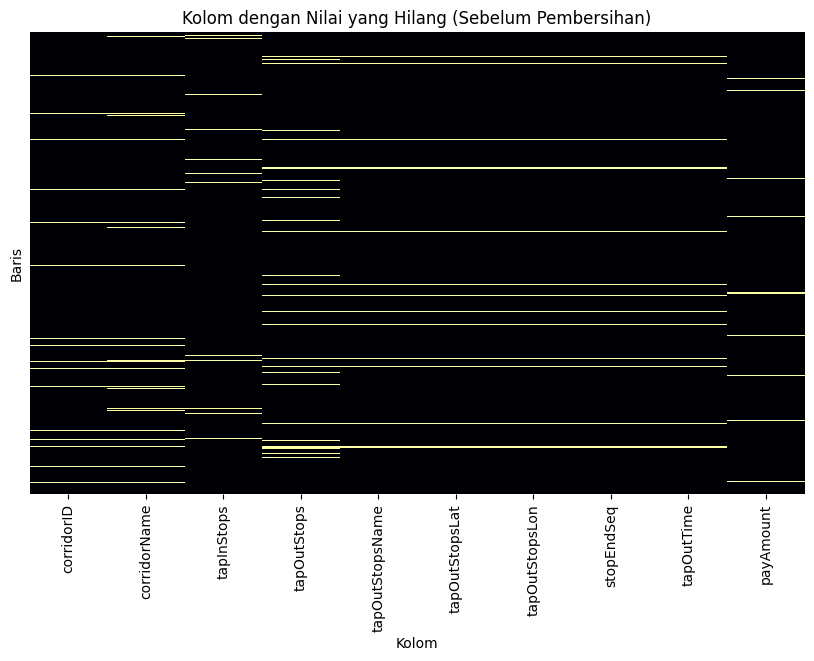

In [5]:
# Visualisasikan nilai yang hilang sebelum pembersihan
na_columns = raw_data.columns[raw_data.isna().any()].tolist()

if na_columns:
    print(f'Kolom dengan nilai yang hilang: {len(na_columns)} ditemukan.')
    print_data_info(raw_data[na_columns])
    
    # Gambarkan heatmap untuk kolom dengan nilai yang hilang
    draw_isna_heatmap(raw_data[na_columns], 'Kolom dengan Nilai yang Hilang (Sebelum Pembersihan)')
else:
    print("Tidak ada kolom dengan nilai yang hilang ditemukan.")


---
**📝 Gambaran Data**

- **🔢 Kolom dengan _Missing Value_:** **10**
  - `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, `payAmount`
  
- **📊 Kolom dengan  _Missing Value_ Terbanyak:**
  - **`tapOutStops`**: **2,289 baris** | **6,04%** dari total data

- **🔍 Hubungan potensial untuk mengisi nilai yang hilang:**
    - `corridorID` dan `corridorName`
    - `tapInStops` dan `tapInStopsName`
    - `tapOutStops` dan `tapOutStopsName`
---


#### Menangani missing values untuk `corridorID` dan `corridorName`

Langkah-langkah berikut dilakukan untuk menangani nilai yang hilang dalam kolom `corridorID` dan `corridorName`:

1. **Salin Data Asli**
   - Buat salinan dari data asli untuk diproses lebih lanjut.

2. **Isi Nilai yang Hilang**
   - **Kolom `corridorName`:** Mengisi nilai yang hilang menggunakan metode `ffill()` (forward fill) dan `bfill()` (backward fill) berdasarkan `corridorID`.
   - **Kolom `corridorID`:** Mengisi nilai yang hilang menggunakan metode `ffill()` dan `bfill()` berdasarkan `corridorName`.

3. **Tampilkan Jumlah Nilai yang Hilang Sebelum dan Setelah Pembersihan**
   - Hitung dan cetak jumlah nilai yang hilang di kolom-kolom yang diperiksa sebelum dan setelah proses pembersihan data.

4. **Visualisasi Heatmap**
   - Buat heatmap berdampingan untuk kolom-kolom yang diperiksa sebelum dan setelah pembersihan untuk memvisualisasikan perubahan dalam jumlah nilai yang hilang.


Jumlah Missing Values - Sebelum Cleaning:
corridorID      1257
corridorName    1930
dtype: int64

Jumlah Missing Values - Setelah Cleaning:
corridorID      1257
corridorName    1257
dtype: int64


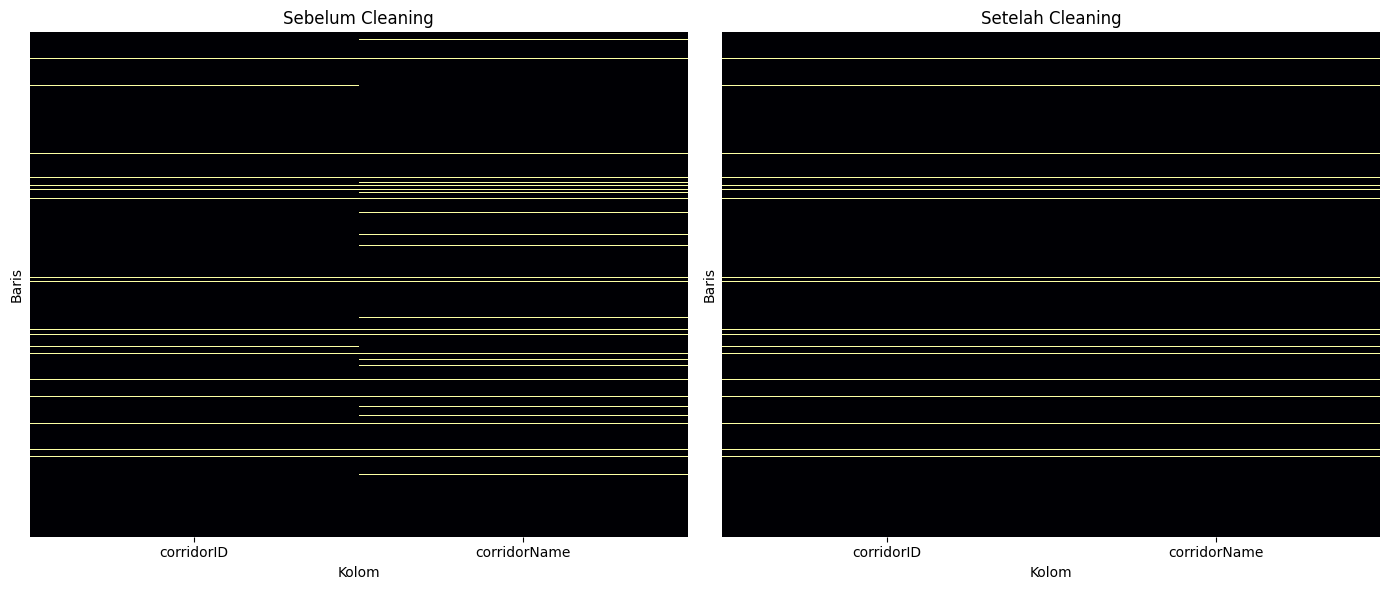

In [6]:
# Persiapkan data yang telah dibersihkan
cleaned_data = raw_data.copy()

# isi missing values di 'corridorID' and 'corridorName'
columns_to_check = ['corridorID', 'corridorName']
cleaned_data['corridorName'] = cleaned_data.groupby('corridorID')['corridorName'].transform(lambda x: x.ffill().bfill())
cleaned_data['corridorID'] = cleaned_data.groupby('corridorName')['corridorID'].transform(lambda x: x.ffill().bfill())

# Tampilkan jumlah missing values untuk raw_data and cleaned_data
missing_values_pre_cleaning = raw_data[columns_to_check].isna().sum()
missing_values_post_cleaning = cleaned_data[columns_to_check].isna().sum()

print("Jumlah Missing Values - Sebelum Cleaning:")
print(missing_values_pre_cleaning)

print("\nJumlah Missing Values - Setelah Cleaning:")
print(missing_values_post_cleaning)

# Tampilkan side-by-side heatmaps for Sebelum dan Setelah cleaning
draw_isna_heatmap_side_by_side(
    [raw_data[columns_to_check], cleaned_data[columns_to_check]],
    ['Sebelum Cleaning', 'Setelah Cleaning']
)

#### Menangani _missing values_ untuk `tap`

##### tapInStops & tapInStopsName

Jumlah Missing Values Sebelum Pembersihan:
tapInStops        1213
tapInStopsName       0
dtype: int64

Jumlah Missing Values Setelah Pembersihan:
tapInStops        34
tapInStopsName     0
dtype: int64


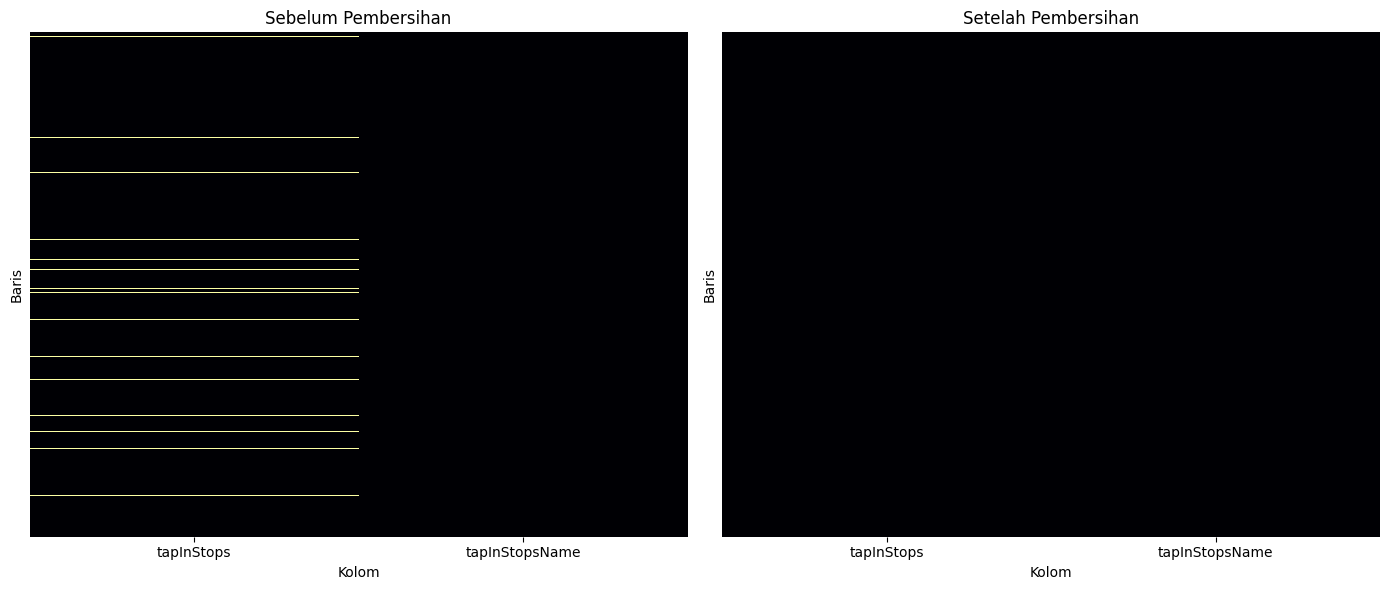

In [7]:
# Isi Missing Values di 'tapInStops' dan 'tapInStopsName'
columns_to_check = ['tapInStops', 'tapInStopsName']
cleaned_data['tapInStops'] = cleaned_data.groupby('tapInStopsName')['tapInStops'].transform(lambda x: x.ffill().bfill())

# Tampilkan jumlah Missing Values untuk raw_data dan cleaned_data
missing_values_pre_cleaning = raw_data[columns_to_check].isna().sum()
missing_values_post_cleaning = cleaned_data[columns_to_check].isna().sum()

print("Jumlah Missing Values Sebelum Pembersihan:")
print(missing_values_pre_cleaning)

print("\nJumlah Missing Values Setelah Pembersihan:")
print(missing_values_post_cleaning)

# Buat heatmap berdampingan untuk sebelum dan setelah pembersihan
draw_isna_heatmap_side_by_side(
    [raw_data[columns_to_check], cleaned_data[columns_to_check]],
    ['Sebelum Pembersihan', 'Setelah Pembersihan']
)

##### tapOutStops & tapOutStopsName

Jumlah Missing Values Sebelum Pembersihan:
tapOutStops        2289
tapOutStopsName    1344
dtype: int64

Jumlah Missing Values Setelah Pembersihan:
tapOutStops        1363
tapOutStopsName    1344
dtype: int64


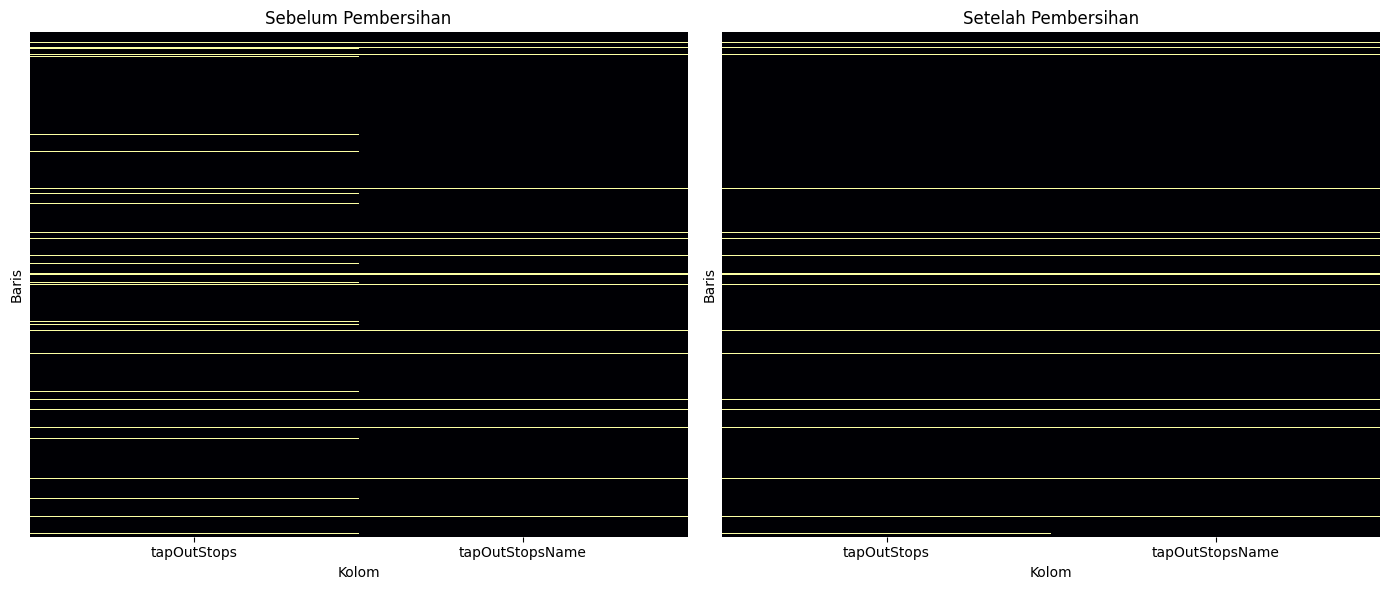

In [8]:
# Isi Missing Values di 'tapOutStops' dan 'tapOutStopsName'
columns_to_check = ['tapOutStops', 'tapOutStopsName']
cleaned_data['tapOutStops'] = cleaned_data.groupby('tapOutStopsName')['tapOutStops'].transform(lambda x: x.ffill().bfill())

# Tampilkan jumlah Missing Values untuk raw_data dan cleaned_data
missing_values_pre_cleaning = raw_data[columns_to_check].isna().sum()
missing_values_post_cleaning = cleaned_data[columns_to_check].isna().sum()

print("Jumlah Missing Values Sebelum Pembersihan:")
print(missing_values_pre_cleaning)

print("\nJumlah Missing Values Setelah Pembersihan:")
print(missing_values_post_cleaning)

# Buat heatmap berdampingan untuk sebelum dan setelah pembersihan
draw_isna_heatmap_side_by_side(
    [raw_data[columns_to_check], cleaned_data[columns_to_check]],
    ['Sebelum Pembersihan', 'Setelah Pembersihan']
)

##### PAY AMOUNT

**Catatan:** Dalam program Jaklingko, semua layanan diberikan secara gratis, sehingga nilai untuk kolom `Pay Amount` adalah 0. Oleh karena itu, tidak ada nilai yang hilang atau perlu diisi pada kolom ini. Data ini seharusnya menunjukkan harga 0 untuk setiap transaksi yang dilakukan di bawah program Jaklingko.


In [9]:
'''
Mengisi nilai kosong di kolom 'payAmount' dengan 0 
untuk baris yang mengandung 'JAK' di kolom 'corridorID'
''' 

cleaned_data.loc[cleaned_data['corridorID'].str.contains('JAK', na=False), 'payAmount'] = 0


# Menampilkan jumlah nilai kosong di kolom 'payAmount' sebelum dan sesudah pembersihan
print("Jumlah Nilai Kosong Sebelum Pembersihan:")
print(raw_data[['payAmount']].isna().sum())

print("\nJumlah Nilai Kosong Setelah Pembersihan:")
print(cleaned_data[['payAmount']].isna().sum())


Jumlah Nilai Kosong Sebelum Pembersihan:
payAmount    1007
dtype: int64

Jumlah Nilai Kosong Setelah Pembersihan:
payAmount    600
dtype: int64


#### Raw vs Cleaned Data


Perbandingan berikut menunjukkan perbedaan antara data sebelum dan setelah dilakukan pembersihan. Ini mencakup informasi mendetail tentang kolom-kolom yang memiliki nilai kosong serta visualisasi heatmap untuk melihat perubahan pada pola nilai kosong.

**1. Informasi Data:**
- **Data Mentah (Raw Data):** Menampilkan informasi mendetail tentang kolom yang memiliki nilai kosong sebelum dilakukan pembersihan.
- **Data Bersih (Cleaned Data):** Menampilkan informasi yang sama setelah proses pembersihan untuk melihat perbaikan yang telah dilakukan.

**2. Visualisasi Heatmap:**
- **Heatmap Sebelum Pembersihan:** Menampilkan pola nilai kosong pada data sebelum dilakukan pembersihan.
- **Heatmap Setelah Pembersihan:** Menampilkan pola nilai kosong pada data setelah proses pembersihan, memperlihatkan hasil dari tindakan yang telah diambil untuk mengatasi nilai kosong.

----------------------------------------------------------------------------------------------
----------------------------------------   RAW DATA   ----------------------------------------
----------------------------------------------------------------------------------------------
Jumlah baris: 37,900, Jumlah kolom: 10
--------------------------------------------------------------------------------


,Feature,Data Type,Null Count,Null Percentage (%),Unique Values
0,corridorID,object,1257,3.32,221
1,corridorName,object,1930,5.09,216
2,tapInStops,object,1213,3.20,2570
3,tapOutStops,object,2289,6.04,2230
4,tapOutStopsName,object,1344,3.55,2248
5,tapOutStopsLat,float64,1344,3.55,2237
6,tapOutStopsLon,float64,1344,3.55,2139
7,stopEndSeq,float64,1344,3.55,74
8,tapOutTime,object,1344,3.55,35908
9,payAmount,float64,1007,2.66,3


----------------------------------------------------------------------------------------------
--------------------------------------   CLEANED DATA   --------------------------------------
----------------------------------------------------------------------------------------------
Jumlah baris: 37,900, Jumlah kolom: 10
--------------------------------------------------------------------------------


,Feature,Data Type,Null Count,Null Percentage (%),Unique Values
0,corridorID,object,1257,3.32,221
1,corridorName,object,1257,3.32,216
2,tapInStops,object,34,0.09,2570
3,tapOutStops,object,1363,3.60,2230
4,tapOutStopsName,object,1344,3.55,2248
5,tapOutStopsLat,float64,1344,3.55,2237
6,tapOutStopsLon,float64,1344,3.55,2139
7,stopEndSeq,float64,1344,3.55,74
8,tapOutTime,object,1344,3.55,35908
9,payAmount,float64,600,1.58,3


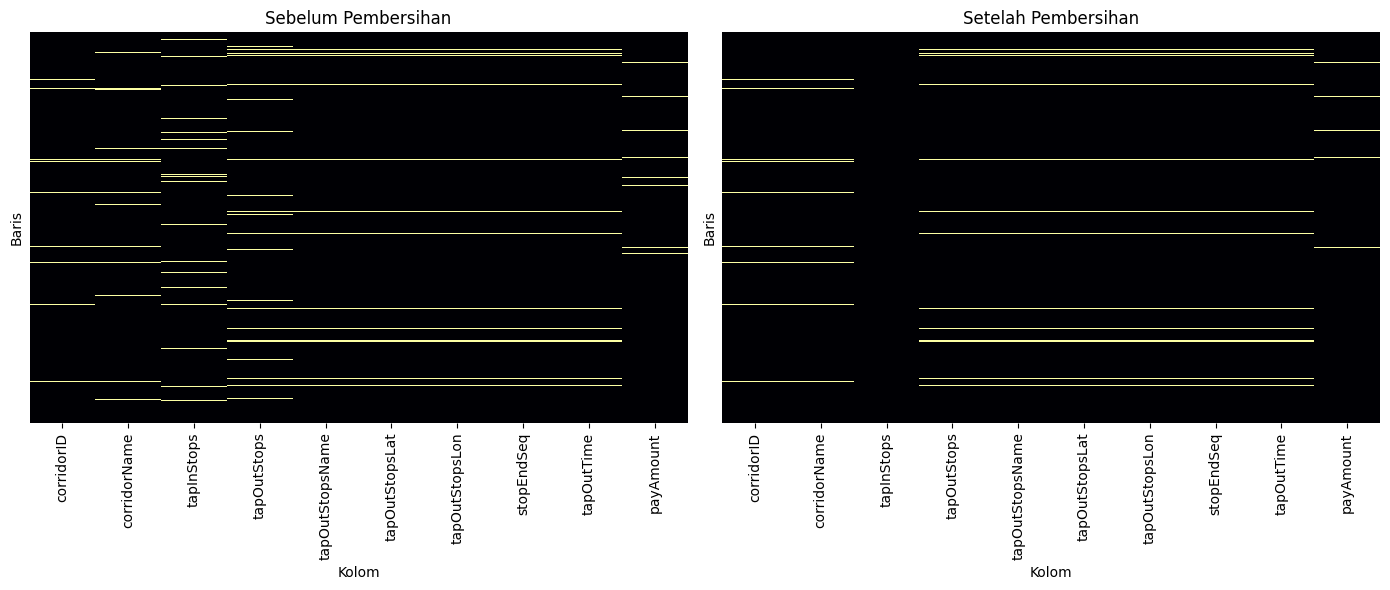

In [10]:
# Menampilkan informasi tentang data sebelum dan setelah pembersihan
print('----------------------------------------------------------------------------------------------')
print('----------------------------------------   RAW DATA   ----------------------------------------')
print('----------------------------------------------------------------------------------------------')
print_data_info(raw_data[na_columns])

print('----------------------------------------------------------------------------------------------')
print('--------------------------------------   CLEANED DATA   --------------------------------------')
print('----------------------------------------------------------------------------------------------')
print_data_info(cleaned_data[na_columns])

# Menampilkan heatmap side-by-side untuk data sebelum dan setelah pembersihan
draw_isna_heatmap_side_by_side(
    [raw_data[na_columns], cleaned_data[na_columns]],
    ['Sebelum Pembersihan', 'Setelah Pembersihan']
)


**📊 Tinjauan _Missing Values_**

| **Dataset**      | **Jumlah Missing Values** | **Persentase** |
|------------------|------------------------:|---------------:|
| **Data Mentah**  |              2,289     |          6.04% |
| **Data Bersih**  |              1,363     |          3.60% |

*✨ Transformasi Data:* Telah terjadi pengurangan signifikan dalam jumlah _Missing Values_ setelah pembersihan data. Meski demikian, masih ada beberapa celah yang perlu diperhatikan untuk lebih menyempurnakan data kita.


# Mengonversi `tapInTime` dan `tapOutTime` ke format datetime

In [11]:
# Mengonversi `tapInTime` dan `tapOutTime` ke format datetime
cleaned_data['tapInTime'] = pd.to_datetime(cleaned_data['tapInTime'], errors='coerce')
cleaned_data['tapOutTime'] = pd.to_datetime(cleaned_data['tapOutTime'], errors='coerce')

# Kolom yang menjadi fokus
selected_columns = ['tapInTime', 'tapOutTime']

# Menampilkan informasi data untuk kolom yang dipilih sebelum dan sesudah pembersihan
print("### Informasi Data Sebelum Pembersihan")
print_data_info(raw_data[selected_columns])

print("\n### Informasi Data Setelah Pembersihan")
print_data_info(cleaned_data[selected_columns])


### Informasi Data Sebelum Pembersihan
Jumlah baris: 37,900, Jumlah kolom: 2
--------------------------------------------------------------------------------


,Feature,Data Type,Null Count,Null Percentage (%),Unique Values
0,tapInTime,object,0,0.00,37079
1,tapOutTime,object,1344,3.55,35908



### Informasi Data Setelah Pembersihan
Jumlah baris: 37,900, Jumlah kolom: 2
--------------------------------------------------------------------------------


,Feature,Data Type,Null Count,Null Percentage (%),Unique Values
0,tapInTime,datetime64[ns],0,0.00,37079
1,tapOutTime,datetime64[ns],1344,3.55,35908


### Finalized Cleaned Data

In [12]:
'''
Menghapus baris yang masih memiliki nilai yang hilang dari DataFrame yang telah dibersihkan dan 
menampilkan informasi tentang data yang telah dibersihkan.
'''
 # Menghapus baris yang masih memiliki nilai yang hilang
data = cleaned_data.dropna()

# Menampilkan informasi data setelah pembersihan akhir
print_data_info(data)

# Ekspor data ke file CSV
data.to_csv('data/cleaned_data.csv', index=False)

# Ekspor data ke file xlsx (XLSX)
data.to_excel('data/cleaned_data.xlsx', index=False)

Jumlah baris: 34,751, Jumlah kolom: 22
--------------------------------------------------------------------------------


,Feature,Data Type,Null Count,Null Percentage (%),Unique Values
0,transID,object,0,0.0,34751
1,payCardID,int64,0,0.0,1956
2,payCardBank,object,0,0.0,6
3,payCardName,object,0,0.0,1949
4,payCardSex,object,0,0.0,2
5,payCardBirthDate,int64,0,0.0,66
6,corridorID,object,0,0.0,218
7,corridorName,object,0,0.0,213
8,direction,float64,0,0.0,2
9,tapInStops,object,0,0.0,2481
